<a href="https://colab.research.google.com/github/Nguyn-3009/existing-project/blob/master/COSC2753_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
# Load data
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

# Attach schemas for each features

# Read the schema file
with open('/content/drive/MyDrive/Colab Notebooks/readme.txt', 'r') as file:
    lines = file.readlines()

# Parse each line into column name and description
schema = []
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespace
    if line:  # Skip empty lines
        key, value = line.split(': ', 1)  # Split on the first occurrence of ': '
        schema.append({
            "Column Name": key,
            "Description": value
        })

# Create a DataFrame for the schema
schema_df = pd.DataFrame(schema)
for idx, row in schema_df.iterrows():
    print(f"{row['Column Name']}: {row['Description']}")

ID: row index (not an attribute)
TARGET-LifeExpectancy: Life Expectancy in age (years)
Country: index of Country
Year: Year
Status: Developed or Developing status (0, 1)
AdultMortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
AdultMortality-Female: Adult Mortality Rates of Female (probability of dying between 15 and 60 years per 1000 population)
AdultMortality-Male: Adult Mortality Rates of Male (probability of dying between 15 and 60 years per 1000 population)
SLS: Number of Short Life Span per 1000 population
Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
PercentageExpenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
Measles: Measles - number of reported cases per 1000 population
BMI: Average: Body Mass Index of entire population
Under5LS: Number of under-five Life Span per 1000 population
Polio: Polio (Pol3) immunization coverage among 1-year-olds

In [31]:
# Copy data for analysing without affecting the original data
train = train_data.copy();
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2071 non-null   int64  
 1   TARGET_LifeExpectancy         2071 non-null   float64
 2   Country                       2071 non-null   int64  
 3   Year                          2071 non-null   int64  
 4   Status                        2071 non-null   int64  
 5   AdultMortality                2070 non-null   float64
 6   AdultMortality-Male           2071 non-null   int64  
 7   AdultMortality-Female         2071 non-null   int64  
 8   SLS                           2071 non-null   int64  
 9   Alcohol                       2067 non-null   float64
 10  PercentageExpenditure         2062 non-null   float64
 11  Measles                       2070 non-null   float64
 12  BMI                           2063 non-null   float64
 13  Und

In [32]:
train.describe()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2070.00000,2071.000000,2071.000000,2071.000000,2067.000000,...,2070.000000,2061.000000,2071.000000,2068.000000,2062.000000,2.063000e+03,2070.000000,2070.000000,2066.000000,2064.000000
mean,1036.000000,69.274505,95.360212,2009.518590,0.185418,162.82029,161.908257,163.759536,33.079672,4.693009,...,82.720773,5.881827,82.753259,1.632544,7304.336600,1.205231e+07,4.939034,4.977971,0.609866,3.372332
std,597.990524,9.482281,54.861641,4.614147,0.388730,118.89928,119.442235,118.800292,135.832868,4.205270,...,23.192604,2.557347,23.130969,4.784991,15179.036764,6.403752e+07,4.697848,4.786593,0.216610,0.590975
min,1.000000,37.300000,0.000000,2002.000000,0.000000,1.00000,0.000000,2.000000,0.000000,0.010000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,518.500000,63.000000,50.000000,2006.000000,0.000000,74.00000,74.000000,74.000000,0.000000,0.615000,...,77.000000,4.180000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,1036.000000,71.200000,94.000000,2010.000000,0.000000,144.00000,142.000000,144.000000,3.000000,3.820000,...,93.000000,5.640000,93.000000,0.100000,1390.315000,6.477440e+05,3.200000,3.300000,0.655500,3.449638
75%,1553.500000,76.000000,144.000000,2014.000000,0.000000,228.00000,228.000000,230.000000,22.000000,7.840000,...,97.000000,7.430000,97.000000,0.800000,5746.287500,5.364814e+06,7.375000,7.400000,0.770000,3.741657
max,2071.000000,92.700000,192.000000,2017.000000,1.000000,699.00000,704.000000,722.000000,1800.000000,17.870000,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


Some features have missing value, that need to be handled

In [33]:
test = test_data.copy();
test

,ID,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,120,2017,0,335,314,356,66,6.35,0.000000,...,7.0,3.84,64,1.9,4139.29,2785935.0,8.3,8.2,0.531,3.376389
1,2,120,2016,0,348,338,358,67,8.33,23.965612,...,68.0,3.31,64,2.0,536.83,2692466.0,8.5,8.3,0.527,3.376389
2,3,120,2015,0,355,362,348,69,8.10,35.958573,...,67.0,4.26,77,2.3,542.77,2599834.0,8.6,8.5,0.523,3.376389
3,4,120,2014,0,358,348,368,72,8.24,256.122524,...,75.0,3.30,75,2.6,5150.04,259615.0,8.8,8.6,0.508,3.209361
4,5,120,2013,0,361,368,354,75,8.06,239.891392,...,73.0,3.38,71,2.5,4815.02,24218565.0,8.9,8.8,0.495,3.065942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,155,2006,0,723,668,778,27,4.36,0.000000,...,67.0,7.13,65,33.6,508.89,12777511.0,9.4,9.4,0.407,3.033150
863,864,155,2005,0,715,742,688,26,4.06,0.000000,...,7.0,6.52,68,36.7,507.75,12633897.0,9.8,9.9,0.418,3.082207
864,865,155,2004,0,73,72,74,25,4.43,0.000000,...,73.0,6.53,71,39.8,64.23,125525.0,1.2,1.3,0.427,3.162278
865,866,155,2003,0,686,672,700,25,1.72,0.000000,...,76.0,6.16,75,42.1,614.42,12366165.0,1.6,1.7,0.427,3.130495


# ***Check assumption***

In [34]:
train = train.sort_values(by=["Country", "Year"])
train_data_cleaned = train.copy()

mask = train_data_cleaned['AdultMortality'] != (train_data_cleaned['AdultMortality-Male'] + train_data_cleaned['AdultMortality-Female']) / 2
print(train_data_cleaned[mask])
train_data_cleaned.loc[mask, 'AdultMortality'] = (train_data_cleaned['AdultMortality-Male'] + train_data_cleaned['AdultMortality-Female']) / 2
train_data_cleaned['AdultMortality'].isna().sum()

      ID  TARGET_LifeExpectancy  Country  Year  Status  AdultMortality  \
202  203                   69.6      182  2007       0             NaN   

     AdultMortality-Male  AdultMortality-Female  SLS  Alcohol  ...  Polio  \
202                  188                    194    0     6.25  ...   96.0   

     TotalExpenditure  Diphtheria  HIV-AIDS      GDP  Population  \
202              4.45        96.0       0.8  4405.33    283277.0   

     Thinness1-19years  Thinness5-9years  IncomeCompositionOfResources  \
202                3.6               3.5                         0.695   

     Schooling  
202   3.577709  

[1 rows x 24 columns]


np.int64(0)

# ***Data insights***

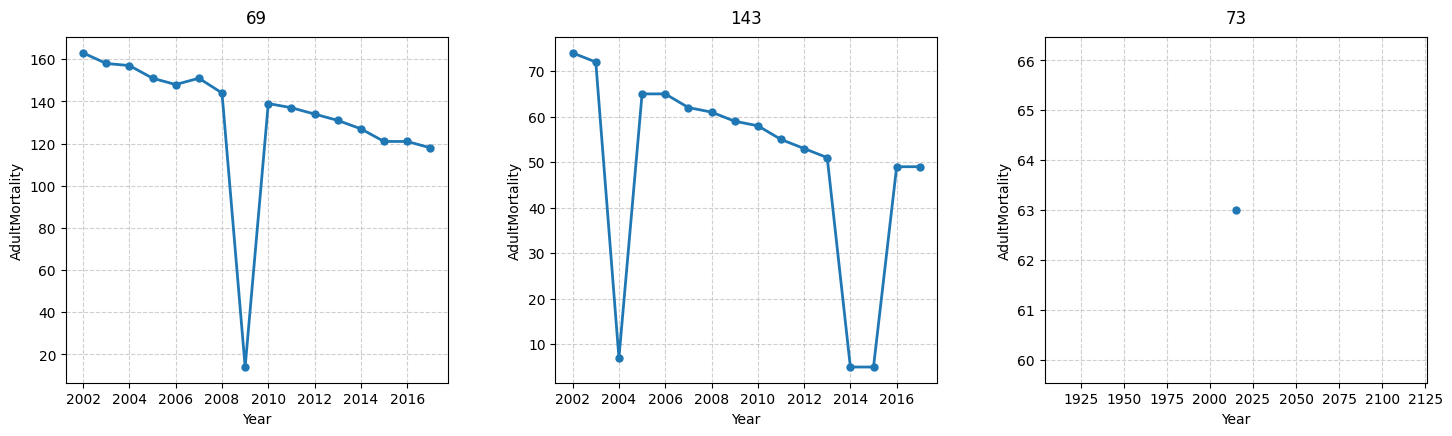

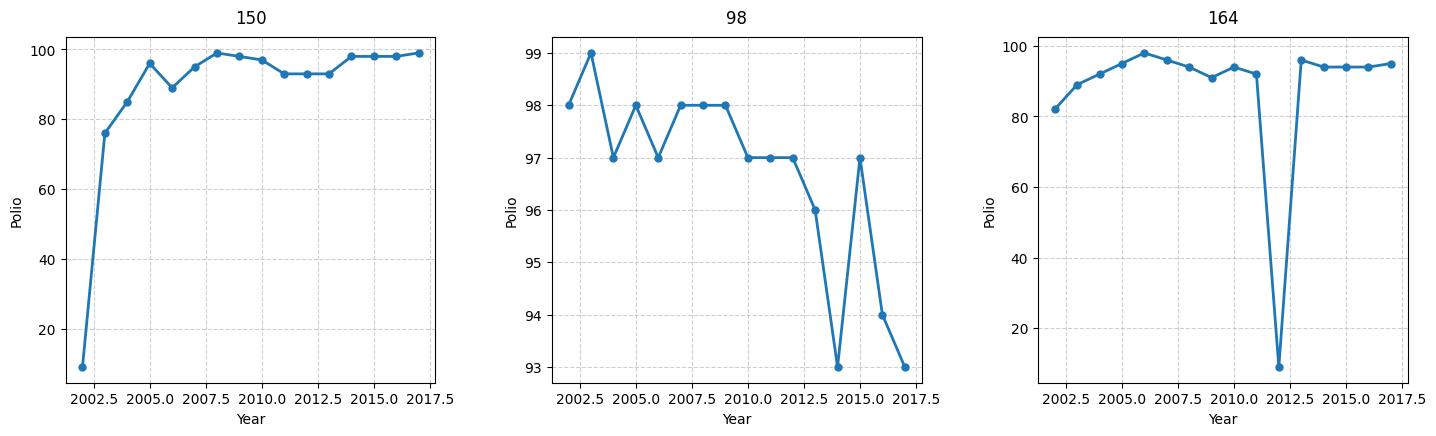

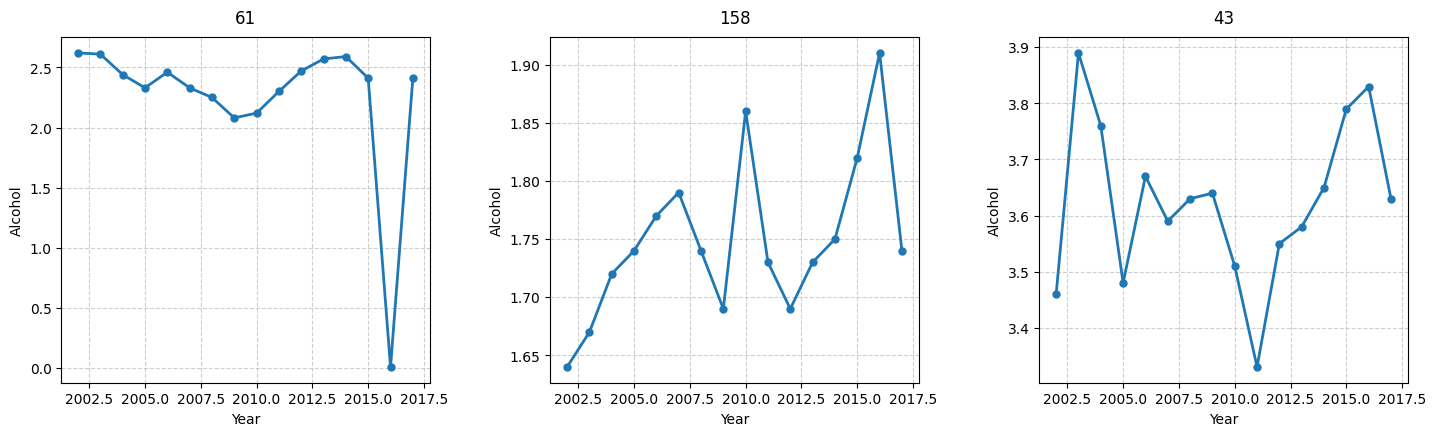

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
def plot_attribute(attribute):
  data = train[['Country', 'Year', attribute]].sort_values(by=['Country', 'Year'])

  # Select random countries without replacement
  random_countries = np.random.choice(data['Country'].unique(), size=3, replace=False)

  # Set up the subplot grid (3 columns, dynamic rows)
  n_cols = 3
  n_rows = int(np.ceil(len(random_countries) / n_cols))  # Rounds up

  # Create figure with appropriate sizing
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))  # Width=15, height=5 per row
  axes = axes.flatten()  # Flatten for easy iteration

  # Plot each country's data
  for i, country in enumerate(random_countries):
      country_data = data[data['Country'] == country]
      axes[i].plot(country_data['Year'], country_data[attribute],
                  marker='o', linestyle='-', linewidth=2, markersize=5)
      axes[i].set_title(f'{country}', pad=10, fontsize=12)
      axes[i].set_xlabel('Year', fontsize=10)
      axes[i].set_ylabel(attribute, fontsize=10)
      axes[i].grid(True, linestyle='--', alpha=0.6)

  # Hide any unused subplots
  for j in range(i+1, len(axes)):
      axes[j].axis('off')

  plt.tight_layout(pad=3.0)  # Add padding between subplots
  plt.show()

plot_attribute('AdultMortality')
plot_attribute('Polio')
plot_attribute('Alcohol')

# ***Clean the data***

Since the data in each country are in time series, therefore the data preprocessing is done as follows:

1.   ***Interpolation is first used to handle NaN values***
2.   ***Capping falsy values (e.g. Measles (per thousands) > 1000, Polio (%) > 100, . . .)***
3.   ***Detect and replace outliers with median / mean***   


In [36]:
for country in train['Country'].unique():
    country_mask = train_data_cleaned['Country'] == country
    for feature in train_data_cleaned.columns:
        if feature not in ['ID', 'Country', 'AdultMortality-Male', 'AdultMortality-Female', 'TARGET_LifeExpectancy']:  # Include all features except ID and Country
            # Get the country's data for this feature
            country_feature_data = train_data_cleaned.loc[country_mask, feature]

            # Only proceed if there are values to interpolate
            if country_feature_data.isna().any():
                # Interpolate, then forward fill, then backward fill
                # Assign back using loc
                train_data_cleaned.loc[country_mask, feature] = country_feature_data.interpolate().ffill().bfill()

# Check if any NaN values remain
print("Remaining NaN values per column:")
print(train_data_cleaned.isna().sum())
train_data_cleaned[train_data_cleaned['Country'] == 0]

Remaining NaN values per column:
ID                              0
TARGET_LifeExpectancy           0
Country                         0
Year                            0
Status                          0
AdultMortality                  0
AdultMortality-Male             0
AdultMortality-Female           0
SLS                             0
Alcohol                         0
PercentageExpenditure           0
Measles                         0
BMI                             0
Under5LS                        0
Polio                           0
TotalExpenditure                0
Diphtheria                      0
HIV-AIDS                        0
GDP                             0
Population                      0
Thinness1-19years               0
Thinness5-9years                0
IncomeCompositionOfResources    0
Schooling                       0
dtype: int64


,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
1637,1638,59.2,0,2002,0,25.0,26,24,27,0.29,...,49.0,4.63,52.0,0.5,530.27,988452.0,12.3,12.3,0.378,2.280351
1636,1637,59.2,0,2003,0,251.0,246,256,26,0.34,...,49.0,4.98,52.0,0.6,539.04,1134497.0,12.1,12.1,0.381,2.323790
1635,1636,57.5,0,2004,0,252.0,248,256,25,0.36,...,6.0,5.60,6.0,0.7,574.85,1396861.0,12.0,11.9,0.397,2.387467
1634,1635,61.7,0,2005,0,251.0,258,244,25,0.33,...,73.0,5.40,73.0,0.7,719.90,16799.0,11.8,11.7,0.401,2.428992
1633,1634,61.6,0,2006,0,247.0,246,248,24,0.35,...,87.0,5.68,87.0,0.7,821.61,1955944.0,11.6,11.5,0.408,2.489980
1632,1633,63.3,0,2007,0,242.0,232,252,23,0.33,...,84.0,5.35,84.0,0.7,866.73,11251266.0,11.4,11.3,0.415,2.529822
1631,1632,59.3,0,2008,0,236.0,228,244,23,0.34,...,89.0,5.44,89.0,0.7,100.62,11556763.0,11.2,11.1,0.422,2.569047
1630,1631,61.4,0,2009,0,23.0,22,24,22,0.32,...,93.0,4.72,94.0,0.7,106.85,11873557.0,11.0,1.9,0.425,2.607681
1629,1630,63.8,0,2010,0,225.0,226,224,22,0.28,...,87.0,4.94,88.0,0.6,12.70,1223957.0,1.8,1.7,0.435,2.664583
1628,1629,63.4,0,2011,0,219.0,216,222,21,0.30,...,83.0,4.81,86.0,0.5,14.07,1255917.0,1.6,1.5,0.444,2.738613


# ***Capping data with invalid unit if there is any***

In [37]:
# Per 1000
train_data_cleaned['Under5LS'] = train_data_cleaned['Under5LS'].clip(upper=1000)
train_data_cleaned['SLS'] = train_data_cleaned['SLS'].clip(upper=1000)

# Percentage
train_data_cleaned['Polio'] = train_data_cleaned['Polio'].clip(upper=100)
train_data_cleaned['Diphtheria'] = train_data_cleaned['Diphtheria'].clip(upper=100)
train_data_cleaned['Thinness1-19years'] = train_data_cleaned['Thinness1-19years'].clip(upper=100)
train_data_cleaned['Thinness5-9years'] = train_data_cleaned['Thinness5-9years'].clip(upper=100)

# ***Replace outliers with mean when data is normally distributed, with median when data is skewed***

In [38]:
from scipy.stats import skew

def replace_outliers(series):
    """
    Replaces outliers with mean (symmetric) or median (skewed).
    Returns original if Series has ≤1 value.
    """
    series = pd.Series(series).copy()

    # Edge case: Series too short for outlier detection
    if len(series) <= 1 or series.nunique() == 1:
        return series

    # Calculate IQR bounds
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Check skewness (skip if all values are identical to avoid division by zero)
    if series.nunique() == 1:
        replacement_value = series.iloc[0]  # All values identical
    else:
        is_skewed = abs(skew(series)) > 1
        replacement_value = series.median() if is_skewed else series.mean()

    # Replace outliers
    return series.mask((series < lower) | (series > upper), replacement_value)

for country in train['Country'].unique():
    country_mask = train_data_cleaned['Country'] == country
    for feature in train_data_cleaned.columns:
        if feature not in ['ID', 'Country', 'AdultMortality-Male', 'AdultMortality-Female', 'TARGET_LifeExpectancy']:
            # Get the country's data for this feature
            country_feature_data = train_data_cleaned.loc[country_mask, feature]

            country_feature_data_cleaned = replace_outliers(country_feature_data)

            # Assign back using loc
            train_data_cleaned.loc[country_mask, feature] = country_feature_data_cleaned

<ipython-input-38-c5c97191b9cd>:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 9.9375 16.     14.     12.     11.     10.     10.      9.      9.
  9.      8.      8.      7.      6.      6.      6.    ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data_cleaned.loc[country_mask, feature] = country_feature_data_cleaned


In [39]:
train_data_cleaned.isna().sum().sum()

np.int64(0)

# ***Features to be removed:***
1.   ***AdultMortality-Male & Adultortality-Female***, since AdultMortality is already an average of these 2 features, therefore these two are removed to avoid redundant.
2.   ***Country*** (index), just indexes of countries, a way of naming, does not affect the life expectancy
3.   ***ID***, same reason with ***country*** feature



# ***Linear regression model***
***Hyperparameters to consider:***
1.   'reg__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] to test wide range of regularization strength



In [40]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression_model(X, y, test_size=0.2, random_state=42):
    """
    Perform linear regression with Ridge regularization, MinMax scaling,
    hyperparameter tuning, and k-fold cross-validation

    Parameters:
    X : array-like of shape (n_samples, n_features) - Training input data
    y : array-like of shape (n_samples,) - Target values
    test_size : float, default=0.2 - Proportion of dataset to include in test split
    random_state : int, default=42 - Random state for reproducibility

    Returns:
    dict: Results including best model, scores, and predictions
    """

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Create pipeline with MinMaxScaler and Ridge regression
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Scale features to [0,1] range
        ('reg', Ridge())  # Ridge regression
    ])

    # Define parameter grid for hyperparameter tuning
    param_grid = {
        'reg__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]  # Regularization strength
    }

    # Set up KFold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=kf,
        scoring='neg_mean_squared_error',
        n_jobs=-1  # Use all available CPU cores
    )

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Calculate performance metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Get coefficients from the best model
    ridge_coef = best_model.named_steps['reg'].coef_
    intercept = best_model.named_steps['reg'].intercept_

    # Prepare results dictionary
    results = {
        'best_model': best_model,
        'best_parameters': best_params,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'coefficients': ridge_coef,
        'intercept': intercept,
        'y_test_pred': y_test_pred,
        'y_test_actual': y_test,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'scaler': best_model.named_steps['scaler']  # Include fitted scaler
    }

    # Print summary of results
    print("Best Parameters:", best_params)
    print("\nTraining Performance:")
    print(f"MSE: {train_mse:.4f}")
    print(f"R² Score: {train_r2:.4f}")
    print("\nTest Performance:")
    print(f"MSE: {test_mse:.4f}")
    print(f"R² Score: {test_r2:.4f}")
    print("\nModel Coefficients:", ridge_coef)
    print("Intercept:", intercept)

    return results

best_model_linear_regression = linear_regression_model(train_data_cleaned.drop(columns=['ID', 'Country', 'AdultMortality-Male', 'AdultMortality-Female', 'TARGET_LifeExpectancy']), train_data_cleaned['TARGET_LifeExpectancy'])

Best Parameters: {'reg__alpha': 0.01}

Training Performance:
MSE: 18.7319
R² Score: 0.7969

Test Performance:
MSE: 18.2400
R² Score: 0.7706

Model Coefficients: [  1.37515673   2.38153468 -18.10066272  27.1910228    3.10321094
   2.60592739  -5.06591913   5.32421389 -24.45740974   6.85690273
  -2.78516768   2.7998903  -22.17289809   2.02915644  -0.5326048
  -0.14627578  -0.54956244   6.90121463   4.19234778]
Intercept: 54.95304758725845


# ***Polynomial regression model (degree > 1)***

***Hyperparamter to consider:***

1.   ***degree*** of polynomial regression model:
  *   degree = 2: Polynomial regression 190 terms with bias. ( < 2071 samples )
  *   degree = 3: 1130 terms with bias. ( < 2071 samples )
  *   degree = 4: 7315 terms with bias. ( > 2071 samples, risk overfitting ) --> drop 4.
*   degree = [ 2, 3]
2.   "interaction_only":
* Keep [True, False]: Both are viable—tests if interactions alone suffice or if squared terms add value.
3.   "include_bias":
* Keep [True, False]: No change needed—tests redundancy vs. simplicity.
4.   "reg__alpha":
* 'reg__alpha': [0.001, 0.01, 1.0, 10.0, 100.0, 1000.0]: Covers a broad regularization range for varying feature counts.



In [41]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

def polynomial_regression_model(X, y, test_size=0.2, random_state=42):
    """
    Perform polynomial regression with Ridge regularization, MinMax scaling,
    hyperparameter tuning, and k-fold cross-validation

    Parameters:
    X : array-like of shape (n_samples, n_features) - Training input data
    y : array-like of shape (n_samples,) - Target values
    test_size : float, default=0.2 - Proportion of dataset to include in test split
    random_state : int, default=42 - Random state for reproducibility

    Returns:
    dict: Results including best model, scores, and predictions
    """

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Create pipeline with MinMaxScaler, polynomial features, and Ridge regression
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Scale features to [0,1] range
        ('poly', PolynomialFeatures()),
        ('reg', Ridge())
    ])

    # Define parameter grid for hyperparameter tuning
    param_grid = {
        'poly__degree': [2, 3],  # Polynomial degrees to test
        'poly__interaction_only': [True, False],  # Whether to include only interaction terms
        'poly__include_bias': [True, False],  # Whether to include bias term
        'reg__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]  # Regularization strength
    }

    # Set up KFold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=kf,
        scoring='neg_mean_squared_error',
        n_jobs=-1  # Use all available CPU cores
    )

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Calculate performance metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Get coefficients from the best model
    ridge_coef = best_model.named_steps['reg'].coef_
    intercept = best_model.named_steps['reg'].intercept_

    # Prepare results dictionary
    results = {
        'best_model': best_model,
        'best_parameters': best_params,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'coefficients': ridge_coef,
        'intercept': intercept,
        'y_test_pred': y_test_pred,
        'y_test_actual': y_test,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'scaler': best_model.named_steps['scaler']  # Include fitted scaler
    }

    # Print summary of results
    print("Best Parameters:", best_params)
    print("\nTraining Performance:")
    print(f"MSE: {train_mse:.4f}")
    print(f"R² Score: {train_r2:.4f}")
    print("\nTest Performance:")
    print(f"MSE: {test_mse:.4f}")
    print(f"R² Score: {test_r2:.4f}")
    print("\nModel Coefficients:", ridge_coef)
    print("Intercept:", intercept)
    print("\nFeature scaling ranges:")
    print(f"Min values: {best_model.named_steps['scaler'].data_min_}")
    print(f"Max values: {best_model.named_steps['scaler'].data_max_}")

    return results

best_model_polynomial_regression = polynomial_regression_model(train_data_cleaned.drop(columns=['ID', 'Country', 'AdultMortality-Male', 'AdultMortality-Female', 'TARGET_LifeExpectancy']), train_data_cleaned['TARGET_LifeExpectancy'])

Best Parameters: {'poly__degree': 3, 'poly__include_bias': True, 'poly__interaction_only': False, 'reg__alpha': 0.1}

Training Performance:
MSE: 8.0123
R² Score: 0.9131

Test Performance:
MSE: 9.2180
R² Score: 0.8841

Model Coefficients: [ 0.          5.25198793  0.87657012 ...  3.27497014 -5.43858618
  4.15683057]
Intercept: 48.06592654931562

Feature scaling ranges:
Min values: [2.002e+03 0.000e+00 1.000e+00 0.000e+00 1.000e-02 0.000e+00 0.000e+00
 1.900e+00 0.000e+00 3.000e+00 6.500e-01 2.000e+00 1.000e-01 1.880e+00
 1.230e+02 1.000e-01 1.000e-01 0.000e+00 0.000e+00]
Max values: [2.01700000e+03 1.00000000e+00 6.99000000e+02 1.00000000e+03
 1.78700000e+01 1.94799116e+04 1.41258000e+05 8.73000000e+01
 1.00000000e+03 9.90000000e+01 1.76000000e+01 9.90000000e+01
 5.06000000e+01 1.33473470e+05 1.29385929e+09 2.77000000e+01
 2.86000000e+01 9.48000000e-01 4.35889894e+00]


# ***Train random forest regression model***
***Hyperparameters to consider:***
1.   'n_estimators': 100 - 300 decent starting range [100, 200, 300]
2.   'max_depth': Maximum depth of tree to prevent overfitting [None, 10, 20, 30]



In [43]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

def random_forest_regression_model(X, y, test_size=0.2, random_state=42):
    """
    Perform Random Forest regression with MinMax scaling, hyperparameter tuning,
    and k-fold cross-validation

    Parameters:
    X : array-like of shape (n_samples, n_features) - Training input data
    y : array-like of shape (n_samples,) - Target values
    test_size : float, default=0.2 - Proportion of dataset to include in test split
    random_state : int, default=42 - Random state for reproducibility

    Returns:
    dict: Results including best model, scores, and predictions
    """

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Create pipeline with MinMaxScaler and RandomForestRegressor
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Scale features to [0,1] range
        ('rf', RandomForestRegressor(random_state=random_state))
    ])

    # Define parameter grid for hyperparameter tuning
    param_grid = {
        'rf__n_estimators': [100, 200, 300],  # Number of trees
        'rf__max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    }

    # Set up KFold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=kf,
        scoring='neg_mean_squared_error',
        n_jobs=-1  # Use all available CPU cores
    )

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Calculate performance metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Get feature importances from the best model
    feature_importances = best_model.named_steps['rf'].feature_importances_

    # Prepare results dictionary
    results = {
        'best_model': best_model,
        'best_parameters': best_params,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'feature_importances': feature_importances,
        'y_test_pred': y_test_pred,
        'y_test_actual': y_test,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'scaler': best_model.named_steps['scaler']  # Include fitted scaler
    }

    # Print summary of results
    print("Best Parameters:", best_params)
    print("\nTraining Performance:")
    print(f"MSE: {train_mse:.4f}")
    print(f"R² Score: {train_r2:.4f}")
    print("\nTest Performance:")
    print(f"MSE: {test_mse:.4f}")
    print(f"R² Score: {test_r2:.4f}")
    print("\nFeature Importances:", feature_importances)

    return results

best_model_random_forest_regression = random_forest_regression_model(train_data_cleaned.drop(columns=['ID', 'Country', 'AdultMortality-Male', 'AdultMortality-Female', 'TARGET_LifeExpectancy']), train_data_cleaned['TARGET_LifeExpectancy'])

Best Parameters: {'rf__max_depth': 20, 'rf__n_estimators': 300}

Training Performance:
MSE: 1.1599
R² Score: 0.9874

Test Performance:
MSE: 7.8158
R² Score: 0.9017

Feature Importances: [1.09135775e-02 1.58136664e-04 2.16187825e-01 3.14700231e-03
 1.82484031e-02 5.39671662e-03 5.94016678e-03 4.10301610e-02
 4.18276643e-03 4.95708135e-03 9.93737498e-03 5.99954702e-03
 5.33020203e-01 5.80473052e-03 7.89779625e-03 7.93452469e-03
 1.54655505e-02 8.21028945e-02 2.16755425e-02]


In [44]:
final_test_ids = test['ID']
final_model = best_model_random_forest_regression['best_model']
final_result = final_model.predict(test.drop(columns=['ID', 'Country', 'AdultMortality-Male', 'AdultMortality-Female']))

results_df = pd.DataFrame({
    'ID': final_test_ids,
    'TARGET_LifeExpectancy': final_result
})

# Save to CSV
results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/COSC2753_A1_Predictions_3978262.csv', index=False)